**Sentiment Analysis with Neural bag of words (NBoW) also known as CBoW(continous bag of words)**

In [2]:
!pip install torch==2.3.0 torchtext==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00


In [4]:
import collections
import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

**load data**

In [5]:
train_data,test_data=datasets.load_dataset("imdb",split=["train","test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [6]:
train_data,test_data

(Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }))

In [7]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [8]:
train_data[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

**Tokenization**

In [9]:
from torchtext.data import get_tokenizer

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [10]:
tokenizer = get_tokenizer("basic_english")

In [11]:
tokenizer("Hello world ! How are you doing today? i am doing fantastic!")

['hello',
 'world',
 '!',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'i',
 'am',
 'doing',
 'fantastic',
 '!']

In [12]:
def tokenize_example(example,tokenizer,max_length):
  tokens=tokenizer(example["text"])[:max_length]
  return {"tokens":tokens}

In [13]:
max_length=256
train_data=train_data.map(tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})
test_data=test_data.map(tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [14]:
train_data

Dataset({
    features: ['text', 'label', 'tokens'],
    num_rows: 25000
})

In [15]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [16]:
train_data[0]["tokens"][:25]

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.']

**Validation Data**

In [17]:
test_size=0.25
train_valid_data=train_data.train_test_split(test_size=test_size)
train_data=train_valid_data["train"]
valid_data=train_valid_data["test"]

In [18]:
len(train_data),len(test_data),len(valid_data)

(18750, 25000, 6250)

**Vocabulary**

In [19]:
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [20]:
min_freq=5
special_tokens=["<unk>","<pad>"]
vocab=build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [21]:
len(vocab)

21644

In [22]:
vocab.get_itos()[:10]

['<unk>', '<pad>', 'the', '.', ',', 'a', 'and', 'of', 'to', "'"]

In [23]:
vocab["and"]

6

In [24]:
unk_index=vocab["<unk>"]
pad_index=vocab["<pad>"]

In [25]:
"some_token" in vocab

False

In [26]:
#vocab["some_token"]

In [27]:
vocab.set_default_index(unk_index)

In [28]:
vocab["some_index"]

0

In [29]:
vocab.lookup_indices(["hello","world","some_token"])

[4402, 188, 0]

**numericalize data**

In [30]:
def numericalize_data(example,vocab):
  ids=vocab.lookup_indices(example["tokens"])
  return {"ids" : ids}

In [31]:
train_data=train_data.map(numericalize_data,fn_kwargs={"vocab":vocab})
valid_data=valid_data.map(numericalize_data,fn_kwargs={"vocab":vocab})
test_data=test_data.map(numericalize_data,fn_kwargs={"vocab":vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [32]:
train_data

Dataset({
    features: ['text', 'label', 'tokens', 'ids'],
    num_rows: 18750
})

In [33]:
train_data[0]["tokens"][:10]

['private',
 'practice',
 'is',
 'being',
 'spun',
 'off',
 'the',
 'fairly',
 'successful',
 'and']

In [34]:
vocab.lookup_indices(train_data[0]["tokens"][:10])

[1834, 4560, 10, 123, 10653, 134, 2, 951, 1021, 6]

In [35]:
train_data[0]["ids"][:10]

[1834, 4560, 10, 123, 10653, 134, 2, 951, 1021, 6]

**Converting into tensors**

In [36]:
train_data

Dataset({
    features: ['text', 'label', 'tokens', 'ids'],
    num_rows: 18750
})

In [37]:
train_data=train_data.with_format(type="torch",columns=["ids","label"])
valid_data=valid_data.with_format(type="torch",columns=["ids","label"])
test_data=test_data.with_format(type="torch",columns=["ids","label"])

In [38]:
train_data[0]["label"]

tensor(0)

In [39]:
train_data[0].keys()

dict_keys(['label', 'ids'])

In [40]:
vocab.lookup_tokens(train_data[0]["ids"][:10].tolist())

['private',
 'practice',
 'is',
 'being',
 'spun',
 'off',
 'the',
 'fairly',
 'successful',
 'and']

**DataLoaders**

In [41]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_ids=[i["ids"] for i in batch]
    batch_ids=nn.utils.rnn.pad_sequence(
        batch_ids,padding_value=pad_index,batch_first=True
    )
    batch_label=[i["label"] for i in batch]
    batch_label=torch.stack(batch_label)
    batch={"ids":batch_ids,"label":batch_label}
    return batch

  return collate_fn

In [42]:
def get_data_loader(dataset,batch_size,pad_index,shuffle=False):
  collate_fn=get_collate_fn(pad_index)
  data_loader=torch.utils.data.DataLoader(
      dataset=dataset,
      batch_size=batch_size,
      collate_fn=collate_fn,
      shuffle=shuffle,
  )
  return data_loader


In [43]:
batch_size=512
train_data_loader=get_data_loader(train_data,batch_size,pad_index,shuffle=True)
valid_data_loader=get_data_loader(valid_data,batch_size,pad_index)
test_data_loader=get_data_loader(test_data,batch_size,pad_index)

In [44]:
len(train_data_loader)

37

In [45]:
len(valid_data_loader)

13

In [46]:
len(test_data_loader)

49

**Build the model**

In [47]:
class NBoW(nn.Module):
  def __init__(self,vocab_size,embedding_dim,output_dim,pad_index):
    super().__init__()
    self.embedding=nn.Embedding(vocab_size,embedding_dim,padding_idx=pad_index)
    self.fc=nn.Linear(embedding_dim,output_dim)

  def forward(self,ids):
    embedded=self.embedding(ids)
    pooled=embedded.mean(dim=1)
    prediction=self.fc(pooled)
    return prediction

In [48]:
vocab_size=len(vocab)
embedding_dim=300
output_dim=len(train_data.unique("label"))
model=NBoW(vocab_size,embedding_dim,output_dim,pad_index)

In [49]:
len(vocab)

21644

In [50]:
len(train_data.unique("label"))

2

In [51]:
def count_parameters(model):
  return   sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"the model has{count_parameters(model):,} trainable parameters")

the model has6,493,802 trainable parameters


**this will take a lot of time , so we use glove here**

In [52]:
vectors=torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [07:23, 4.90MB/s]                            
100%|█████████▉| 2196016/2196017 [06:23<00:00, 5723.12it/s]


In [54]:
hello_vector=vectors.get_vecs_by_tokens("hello")

In [56]:
hello_vector.shape

torch.Size([300])

In [57]:
hello_vector[:32]

tensor([ 0.2523,  0.1018, -0.6748,  0.2112,  0.4349,  0.1654,  0.4826, -0.8122,
         0.0413,  0.7850, -0.0779, -0.6632,  0.1464, -0.2929, -0.2549,  0.0193,
        -0.2026,  0.9823,  0.0283, -0.0813, -0.1214,  0.1313, -0.1765,  0.1356,
        -0.1636, -0.2257,  0.0550, -0.2031,  0.2072,  0.0958,  0.2248,  0.2154])

In [58]:
pretrained_embedding=vectors.get_vecs_by_tokens(vocab.get_itos())

In [59]:
pretrained_embedding.shape

torch.Size([21644, 300])

In [60]:
model.embedding.weight

Parameter containing:
tensor([[ 1.0708,  0.2122,  1.7310,  ..., -0.9047, -2.4938,  0.3569],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.0311, -0.1025,  0.5504,  ...,  1.3831, -0.3647,  3.2091],
        ...,
        [ 0.2789, -0.1783, -0.4579,  ..., -0.9779,  0.0188,  0.2474],
        [-0.7447,  0.7134, -0.0554,  ..., -1.1621,  0.3795,  0.0250],
        [-2.1085, -0.8269, -0.5566,  ..., -1.7824, -0.0346, -1.7212]],
       requires_grad=True)

In [62]:
pretrained_embedding

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
        [ 0.2472, -0.7278, -0.0099,  ...,  0.3558, -0.2974, -0.1831],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [63]:
model.embedding.weight.data=pretrained_embedding

In [64]:
model.embedding.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
        [ 0.2472, -0.7278, -0.0099,  ...,  0.3558, -0.2974, -0.1831],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       requires_grad=True)

**Loss function and optimizer**

In [65]:
optimizer=optim.Adam(model.parameters())

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [66]:
criterion=nn.CrossEntropyLoss()

In [68]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [69]:
model=model.to(device)
criterion=criterion.to(device)

**Training and Evaluate Function**

In [70]:
def train(data_loader,model,criterion,optimizer,device):
  model.train()
  epoch_losses=[]
  epoch_accs=[]
  for batch  in tqdm.tqdm(data_loader,desc="training..."):
    ids=batch["ids"].to(device)
    label=batch["label"].to(device)
    prediction=model(ids)
    loss=criterion(prediction,label)
    accuracy=get_accuracy(prediction,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
    epoch_accs.append(accuracy.item())
  return np.mean(epoch_losses),np.mean(epoch_accs)

In [75]:
def evaluate(data_loader,model,criterion,device):
  model.eval()
  epoch_losses=[]
  epoch_accs=[]
  with torch.no_grad():
    for batch in tqdm.tqdm(data_loader,desc="evaluating..."):
      ids=batch["ids"].to(device)
      label=batch["label"].to(device)
      prediction=model(ids)
      loss=criterion(prediction,label)
      accuracy=get_accuracy(prediction,label)
      epoch_losses.append(loss.item())
      epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses),np.mean(epoch_accs)



In [76]:
def get_accuracy(prediction,label):
  batch_size,_=prediction.shape
  predicted_classes=prediction.argmax(dim=-1)
  correct_prediction=predicted_classes.eq(label).sum()
  accuracy=correct_prediction / batch_size
  return accuracy

**Starting Loop**

In [77]:
n_epochs=10
best_valid_loss=float("inf")
metrics=collections.defaultdict(list)
for epoch in range(n_epochs):
  train_loss,train_acc=train(train_data_loader,model,criterion,optimizer,device)
  valid_loss,valid_acc=evaluate(valid_data_loader,model,criterion,device)
  metrics["train_losses"].append(train_loss)
  metrics["train_accs"].append(train_acc)
  metrics["valid_losses"].append(valid_loss)
  metrics["valid_acc"].append(valid_acc)
  if valid_loss <best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),"nbow.pt")
  print(f"epoch:{epoch}")
  print(f"train_loss: {train_loss:.3f},train_acc: {train_acc:.3f}")
  print(f"valid_loss:{valid_loss:.3f},valid_acc: {valid_acc:3f}")

evaluating...: 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]


epoch:0
train_loss: 0.636,train_acc: 0.743
valid_loss:0.609,valid_acc: 0.747432


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


epoch:1
train_loss: 0.573,train_acc: 0.777
valid_loss:0.543,valid_acc: 0.791050


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.30it/s]


epoch:2
train_loss: 0.501,train_acc: 0.822
valid_loss:0.478,valid_acc: 0.826555


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


epoch:3
train_loss: 0.434,train_acc: 0.853
valid_loss:0.426,valid_acc: 0.840952


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.39it/s]


epoch:4
train_loss: 0.380,train_acc: 0.873
valid_loss:0.389,valid_acc: 0.853521


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.42it/s]


epoch:5
train_loss: 0.338,train_acc: 0.888
valid_loss:0.361,valid_acc: 0.858080


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  4.70it/s]


epoch:6
train_loss: 0.305,train_acc: 0.899
valid_loss:0.342,valid_acc: 0.862612


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.42it/s]


epoch:7
train_loss: 0.278,train_acc: 0.909
valid_loss:0.327,valid_acc: 0.867695


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  6.39it/s]


epoch:8
train_loss: 0.256,train_acc: 0.917
valid_loss:0.316,valid_acc: 0.873804


evaluating...: 100%|██████████| 13/13 [00:02<00:00,  4.75it/s]

epoch:9
train_loss: 0.236,train_acc: 0.926
valid_loss:0.308,valid_acc: 0.876483


**visulizeing**

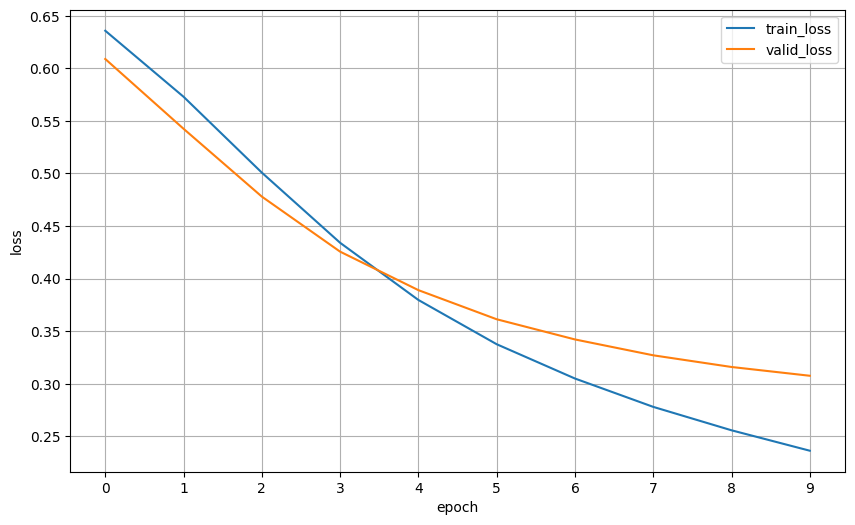

In [83]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(metrics["train_losses"],label="train_loss")
ax.plot(metrics["valid_losses"],label="valid_loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

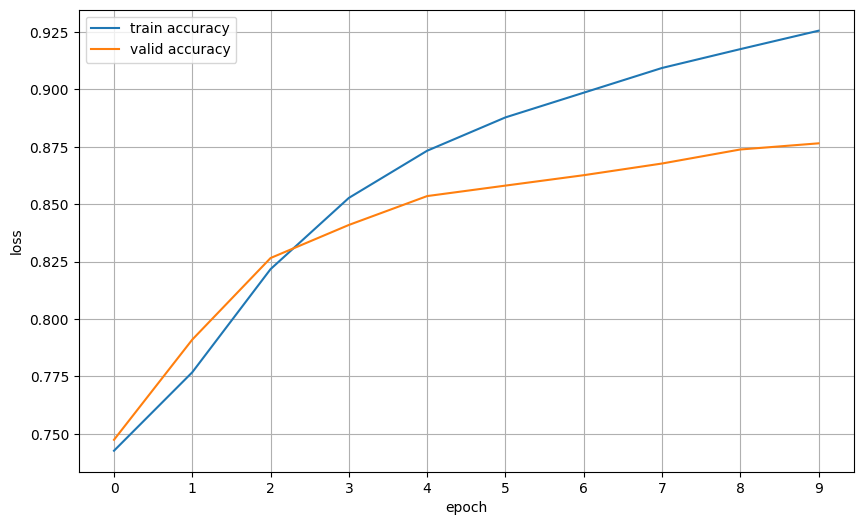

In [87]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_acc"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [89]:
model.load_state_dict(torch.load("nbow.pt"))
test_loss,test_acc=evaluate(test_data_loader,model,criterion,device)

evaluating...: 100%|██████████| 49/49 [00:09<00:00,  5.02it/s]


In [91]:
print(f"test_loss: {test_loss:.3f},test_acc:{test_acc:.3f}")

test_loss: 0.341,test_acc:0.861


**testing model on new sentence**

In [93]:
def predict_sentiment(text,model,tokenizer,vocab,device):
  tokens=tokenizer(text)
  ids=vocab.lookup_indices(tokens)
  tensor=torch.LongTensor(ids).unsqueeze(dim=0).to(device)
  prediction=model(tensor).squeeze(dim=0)
  probability=torch.softmax(prediction,dim=-1)
  predicted_class=prediction.argmax(dim=-1).item()
  predicted_probability=probability[predicted_class].item()
  return predicted_class,predicted_probability


In [94]:
text="this film is terrible"
predict_sentiment(text,model,tokenizer,vocab,device)

(0, 1.0)

In [95]:
text="this film is great"
predict_sentiment(text,model,tokenizer,vocab,device)

(1, 1.0)

In [96]:
text="this film is not terrible,it's great!"
predict_sentiment(text,model,tokenizer,vocab,device)

(1, 0.7963141202926636)